In [1]:
import networkx as nx
g1 = nx.DiGraph()

In [4]:
g1.add_node('a')
g1.add_node(1)
g1.add_node(2)
g1.nodes()

NodeView(('a', 1, 2))

In [5]:
g1.add_edge(1, 'a')
g1.add_edge(1, 2)
g1.edges()

OutEdgeView([(1, 'a'), (1, 2)])

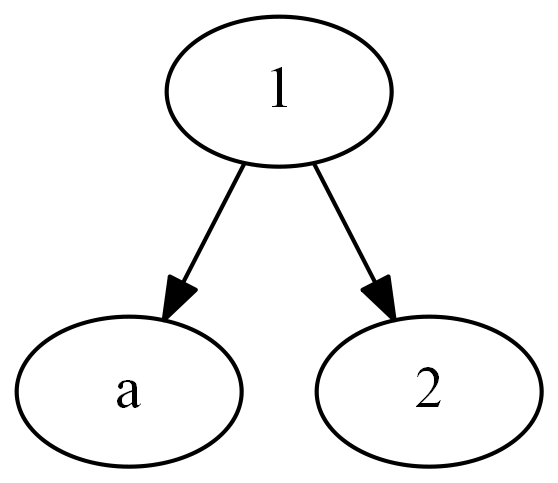

In [22]:
from IPython.core.display import Image
from networkx.drawing.nx_pydot import to_pydot

d1 = to_pydot(g1)
d1.set_dpi(300)
d1.set_rankdir('TB')
d1.set_margin(0)
Image(d1.create_png(), width=300)

In [24]:
len(g1), g1.number_of_nodes(), g1.number_of_edges()

(3, 3, 2)

In [26]:
for n in g1.neighbors(1):
    print(n)

a
2


In [27]:
g2 = nx.Graph()
g2.add_node(1)
g2.add_node(2)
g2.add_node(3)

g2.add_edge(1, 2)
g2.add_edge(2, 2)
g2.add_edge(2, 3)
np.random.seed(0)

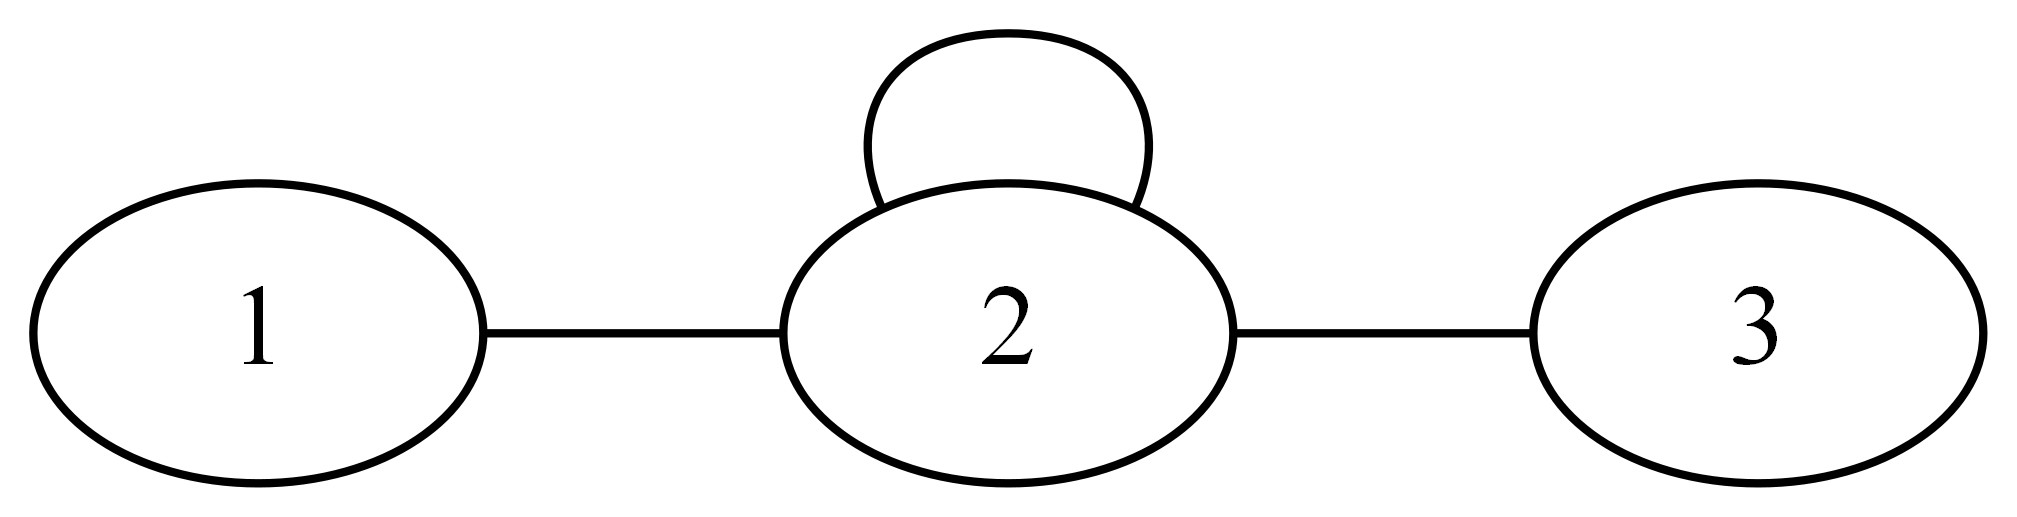

In [30]:
d2 = to_pydot(g2)
d2.set_dpi(600)
d2.set_rankdir('LR')
Image(d2.create_png(), width=600)

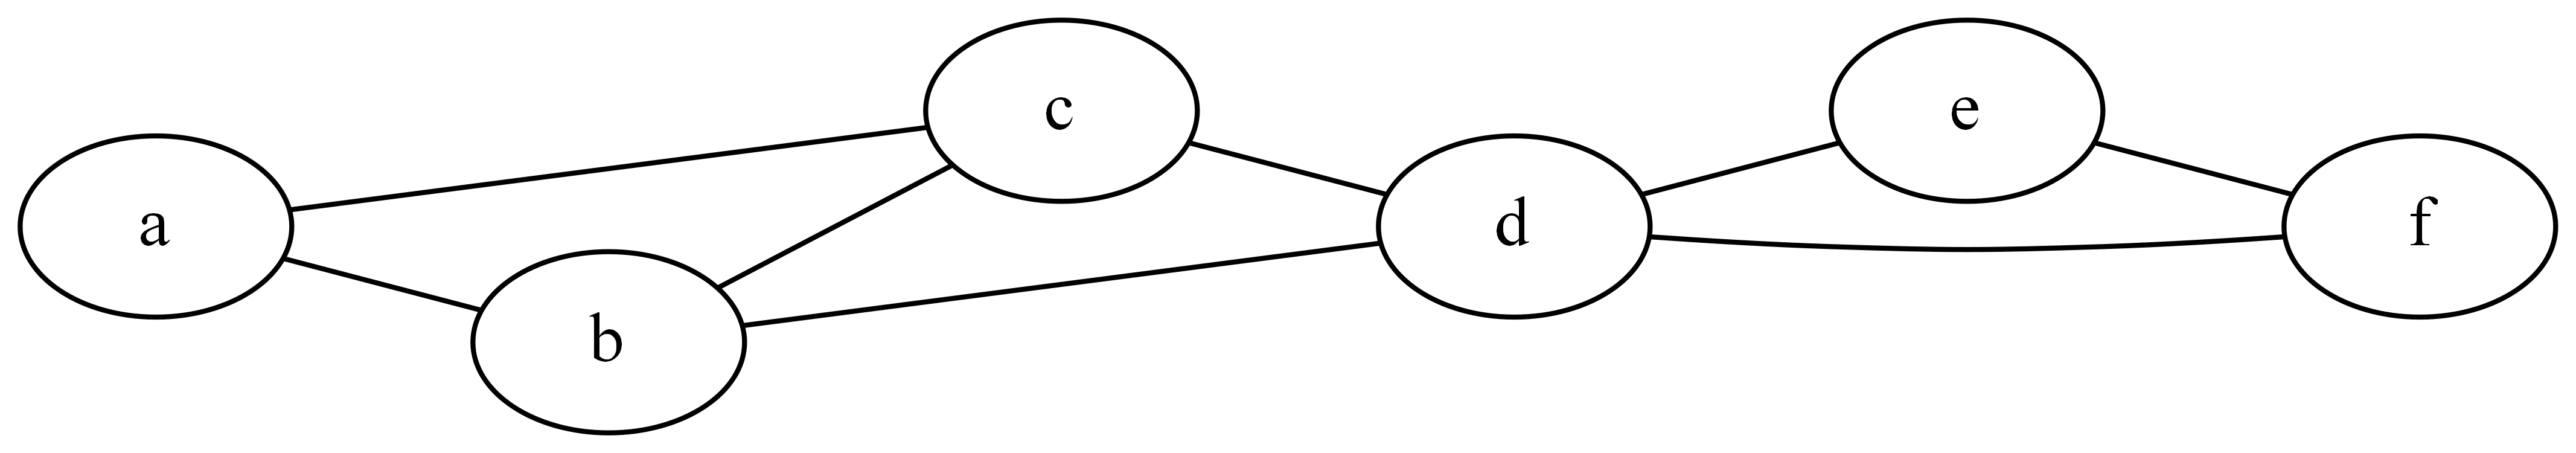

In [35]:
g4 = nx.Graph()
g4.add_node('a')
g4.add_node('b')
g4.add_node('c')
g4.add_node('d')
g4.add_node('e')
g4.add_node('f')

g4.add_edge('a', 'b')
g4.add_edge('a', 'c')
g4.add_edge('c', 'b')
g4.add_edge('b', 'd')
g4.add_edge('c', 'd')
g4.add_edge('e', 'd')
g4.add_edge('d', 'f')
g4.add_edge('e', 'f')

d4 = to_pydot(g4)
d4.set_dpi(600)
d4.set_rankdir('LR')
Image(d4.create_png(), width=600)

In [42]:
nx.cliques_containing_node(g4, ['f'])

{'f': [['d', 'e', 'f']]}

In [43]:
[c for c in nx.enumerate_all_cliques(g4)]

[['a'],
 ['b'],
 ['c'],
 ['d'],
 ['e'],
 ['f'],
 ['a', 'b'],
 ['a', 'c'],
 ['b', 'c'],
 ['b', 'd'],
 ['c', 'd'],
 ['d', 'e'],
 ['d', 'f'],
 ['e', 'f'],
 ['a', 'b', 'c'],
 ['b', 'c', 'd'],
 ['d', 'e', 'f']]

In [44]:
[c for c in nx.find_cliques(g4)]

[['d', 'e', 'f'], ['d', 'b', 'c'], ['a', 'b', 'c']]

In [49]:
from pgmpy.factors.discrete import TabularCPD

P_A = TabularCPD('A', 3, [[0.1], [0.6], [0.3]])
print(P_A)

+------+-----+
| A(0) | 0.1 |
+------+-----+
| A(1) | 0.6 |
+------+-----+
| A(2) | 0.3 |
+------+-----+


In [59]:
P_B_I_A = TabularCPD('B', 
                     3, 
                     np.array([[0.6, 0.3, 0.1], [0.2, 0.5, 0.3], [0.1, 0.3, 0.6]]).T,
                     evidence=['A'], evidence_card=[3])
print(P_B_I_A)

+------+------+------+------+
| A    | A(0) | A(1) | A(2) |
+------+------+------+------+
| B(0) | 0.6  | 0.2  | 0.1  |
+------+------+------+------+
| B(1) | 0.3  | 0.5  | 0.3  |
+------+------+------+------+
| B(2) | 0.1  | 0.3  | 0.6  |
+------+------+------+------+


B 추론

In [68]:
print(P_B_I_A * P_A)

+------+----------------------+------+------+
| A    | A(0)                 | A(1) | A(2) |
+------+----------------------+------+------+
| B(0) | 0.06                 | 0.12 | 0.03 |
+------+----------------------+------+------+
| B(1) | 0.03                 | 0.3  | 0.09 |
+------+----------------------+------+------+
| B(2) | 0.010000000000000002 | 0.18 | 0.18 |
+------+----------------------+------+------+


In [70]:
P_B = (P_B_I_A * P_A).marginalize(['A'], inplace=False)
print(P_B)

+------+------+
| B(0) | 0.21 |
+------+------+
| B(1) | 0.42 |
+------+------+
| B(2) | 0.37 |
+------+------+


In [71]:
P_C_I_B = TabularCPD('C', 3, 
                    np.array([[0.7, 0.2, 0.1], [0.1, 0.6, 0.3], [0.1, 0.1, 0.8]]).T,
                    evidence=['B'], evidence_card=[3])
print(P_C_I_B)

+------+------+------+------+
| B    | B(0) | B(1) | B(2) |
+------+------+------+------+
| C(0) | 0.7  | 0.1  | 0.1  |
+------+------+------+------+
| C(1) | 0.2  | 0.6  | 0.1  |
+------+------+------+------+
| C(2) | 0.1  | 0.3  | 0.8  |
+------+------+------+------+


In [72]:
P_C = (P_C_I_B * P_B).marginalize(['B'], inplace=False)
print(P_C)

+------+-------+
| C(0) | 0.226 |
+------+-------+
| C(1) | 0.331 |
+------+-------+
| C(2) | 0.443 |
+------+-------+


In [109]:
from pgmpy.models import BayesianModel

model = BayesianModel([('A', 'B'), ('B', 'C')])
model.add_cpds(P_A, P_B_I_A, P_C_I_B)
model.check_model()

True

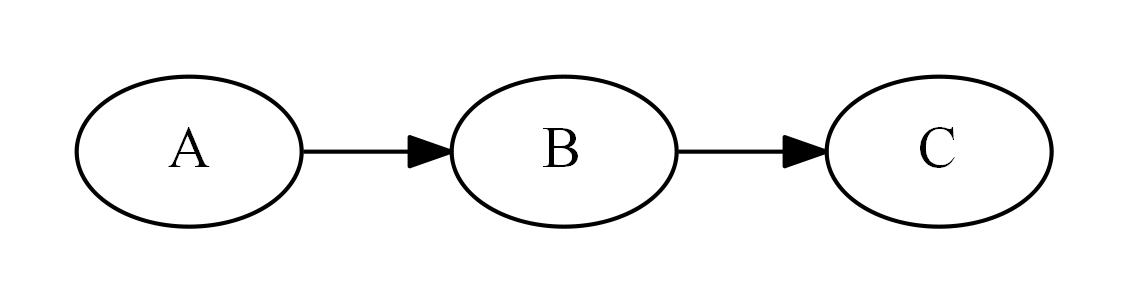

In [88]:
from IPython.core.display import Image
from networkx.drawing.nx_pydot import to_pydot

d = to_pydot(model)
d.set_dpi(300)
d.set_margin(0.2)
d.set_rankdir('LR')
Image(d.create_png(), width=300)

In [110]:
from pgmpy.inference import VariableElimination
from pprint import pprint

inference = VariableElimination(model)
result = inference.query(variables=['C'])
print(result)

Eliminating: B: 100%|███████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 400.18it/s]

+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.2260 |
+------+----------+
| C(1) |   0.3310 |
+------+----------+
| C(2) |   0.4430 |
+------+----------+


In [111]:
from pgmpy.factors.discrete import DiscreteFactor

phi = DiscreteFactor(['x1', 'x2', 'x3'], [2, 2, 2], np.arange(8))
print(phi)

+-------+-------+-------+-----------------+
| x1    | x2    | x3    |   phi(x1,x2,x3) |
+=======+=======+=======+=================+
| x1(0) | x2(0) | x3(0) |          0.0000 |
+-------+-------+-------+-----------------+
| x1(0) | x2(0) | x3(1) |          1.0000 |
+-------+-------+-------+-----------------+
| x1(0) | x2(1) | x3(0) |          2.0000 |
+-------+-------+-------+-----------------+
| x1(0) | x2(1) | x3(1) |          3.0000 |
+-------+-------+-------+-----------------+
| x1(1) | x2(0) | x3(0) |          4.0000 |
+-------+-------+-------+-----------------+
| x1(1) | x2(0) | x3(1) |          5.0000 |
+-------+-------+-------+-----------------+
| x1(1) | x2(1) | x3(0) |          6.0000 |
+-------+-------+-------+-----------------+
| x1(1) | x2(1) | x3(1) |          7.0000 |
+-------+-------+-------+-----------------+


In [112]:
print(P_B_I_A.to_factor())

+------+------+------------+
| B    | A    |   phi(B,A) |
+======+======+============+
| B(0) | A(0) |     0.6000 |
+------+------+------------+
| B(0) | A(1) |     0.2000 |
+------+------+------------+
| B(0) | A(2) |     0.1000 |
+------+------+------------+
| B(1) | A(0) |     0.3000 |
+------+------+------------+
| B(1) | A(1) |     0.5000 |
+------+------+------------+
| B(1) | A(2) |     0.3000 |
+------+------+------------+
| B(2) | A(0) |     0.1000 |
+------+------+------------+
| B(2) | A(1) |     0.3000 |
+------+------+------------+
| B(2) | A(2) |     0.6000 |
+------+------+------------+


In [115]:
### 결과를 기준으로 조회
print(P_B_I_A.to_factor().reduce([('B', 0)], inplace=False).normalize(inplace=False))

+------+----------+
| A    |   phi(A) |
+======+==========+
| A(0) |   0.6667 |
+------+----------+
| A(1) |   0.2222 |
+------+----------+
| A(2) |   0.1111 |
+------+----------+


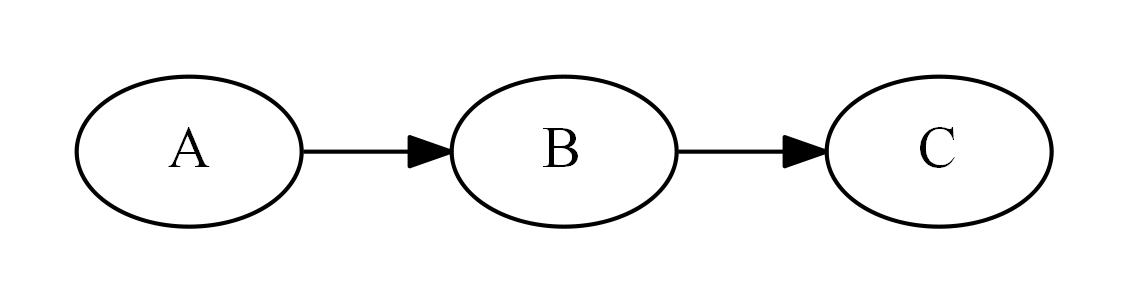

In [192]:
P_A = TabularCPD('A', 3, [[0.1], [0.6], [0.3]])
P_B_I_A = TabularCPD('B', 3, 
    np.array([[0.6, 0.2, 0.2], [0.3, 0.5, 0.2], [0.1, 0.3, 0.6]]),
    evidence=['A'], evidence_card=[3])
P_C_I_B = TabularCPD('C', 3, 
    np.array([[0.8, 0.1, 0.1], [0.1, 0.8, 0.1], [0.1, 0.1, 0.8]]),
    evidence=['B'], evidence_card=[3])
                     
model = BayesianModel([('A', 'B'), ('B', 'C')])
model.add_cpds(P_A, P_B_I_A, P_C_I_B)

d = to_pydot(model)
d.set_dpi(300)
d.set_margin(0.2)
d.set_rankdir("LR")
Image(d.create_png(), width=600)

1. 건강상태가 좋은 경우(A=2)의 성적(C) 분포를 구하라
- P(C) = P(A=2)P(B|A=2)P(C|B)

In [162]:
P_A2 = TabularCPD('A', 3,
                  np.array([0, 0, 1]).reshape(3, 1))
P_B = (P_B_I_A * P_A2).marginalize(['A'], inplace=False)
P_C = (P_C_I_B * P_B).marginalize(['B'], inplace=False)
print(P_C)

+------+------+
| C(0) | 0.24 |
+------+------+
| C(1) | 0.24 |
+------+------+
| C(2) | 0.52 |
+------+------+


In [168]:
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)
print(infer.query(['C'], evidence={'A':2}, show_progress=False))

+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.2400 |
+------+----------+
| C(1) |   0.2400 |
+------+----------+
| C(2) |   0.5200 |
+------+----------+


2. 건강상태는 좋지만(A=2), 공부를 하지 않는 경우(B=0)의 성적분포를 구하라.
- P(C|B=0,A=2) = P(C|B=0)

In [156]:
print((P_C_I_B).reduce([('B',0)], inplace=False).to_factor().normalize(inplace=False))

+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.8000 |
+------+----------+
| C(1) |   0.1000 |
+------+----------+
| C(2) |   0.1000 |
+------+----------+


In [171]:
infer = VariableElimination(model)
print(infer.query(['C'], evidence={'B':0}, show_progress=False))

+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.8000 |
+------+----------+
| C(1) |   0.1000 |
+------+----------+
| C(2) |   0.1000 |
+------+----------+


### 몬티홀 문제

In [179]:
from pgmpy.factors.discrete import TabularCPD

P_P = TabularCPD('P', 3, np.array([0.33, 0.33, 0.33]).reshape(3, 1))
P_C = TabularCPD('C', 3, np.array([0.33, 0.33, 0.33]).reshape(3, 1))
P_H_I_CP = TabularCPD('H', 3, 
                    np.array([[0, 0.5, 0.5], [0, 0, 1], [0, 1, 0], 
                              [0, 0, 1], [0.5, 0, 0.5], [1, 0, 0],
                              [0, 1, 0], [1, 0, 0], [0.5, 0.5, 0]]).T,
                   evidence=['P', 'C'], evidence_card=[3, 3])

In [181]:
from pgmpy.models import BayesianModel

model = BayesianModel([('C', 'H'), ('P', 'H')])
model.add_cpds(P_P, P_C, P_H_I_CP)
model.check_model()

True

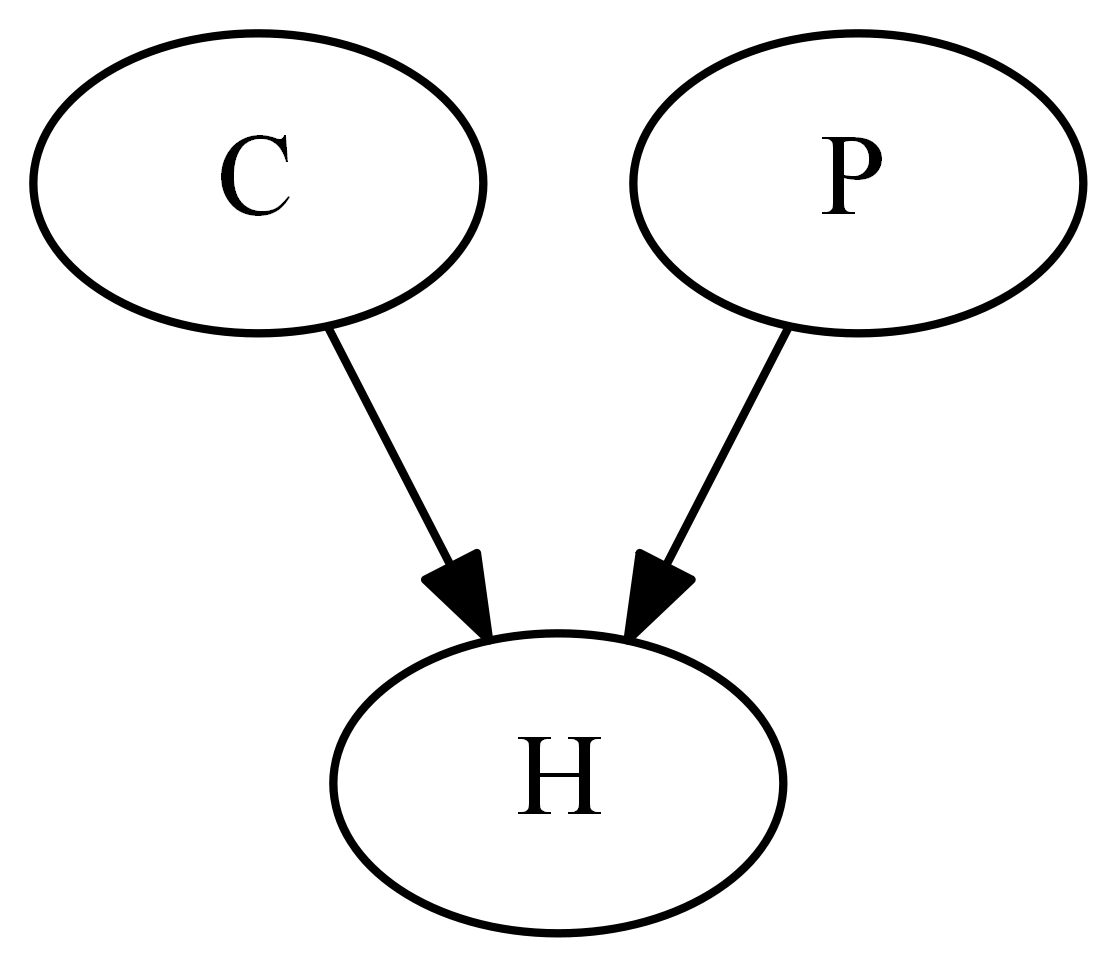

In [182]:
from IPython.core.display import Image
from networkx.drawing.nx_pydot import to_pydot

d = to_pydot(model)
d.set_dpi(600)
Image(d.create_png(), width=400)

In [190]:
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)
print(infer.query(['C'], {'P':1, 'H':0}, show_progress=False))

+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.0000 |
+------+----------+
| C(1) |   0.3333 |
+------+----------+
| C(2) |   0.6667 |
+------+----------+


In [191]:
print(infer.query(['C'], {'P':2, 'H':0}, show_progress=False))

+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.0000 |
+------+----------+
| C(1) |   0.6667 |
+------+----------+
| C(2) |   0.3333 |
+------+----------+


### 신뢰전파

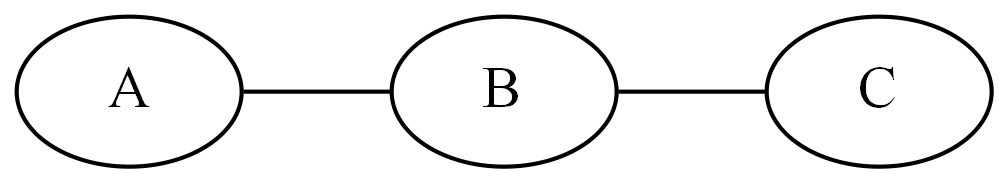

In [195]:
model2 = model.to_markov_model()

d = to_pydot(model2)
d.set_dpi(300)
d.set_rankdir('LR')
Image(d.create_png(), width=400)

In [197]:
from pgmpy.inference import BeliefPropagation

infer = BeliefPropagation(model2)
print(infer.query(['C'], show_progress=False))

+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.2680 |
+------+----------+
| C(1) |   0.3730 |
+------+----------+
| C(2) |   0.3590 |
+------+----------+
